In [91]:
import pandas as pd
import numpy as np

In [92]:
pwd

'/Users/marijansoric/Documents/GitHub/CatMatch'

In [93]:
dfm = pd.read_csv('.data/movies.csv')
dfr = pd.read_csv('.data/ratings.csv')

In [94]:
dfm.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [95]:
dfr.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [119]:
dfr[dfr['movieId']==2].rating.mean()

3.4318181818181817

In [130]:
dfr[dfr['movieId']==1].userId.count()

215

In [131]:
dfm['reviews'] = dfr.apply(lambda x: dfr[dfr['movieId']==x[0]].userId.count() , axis=1)

<AxesSubplot:>

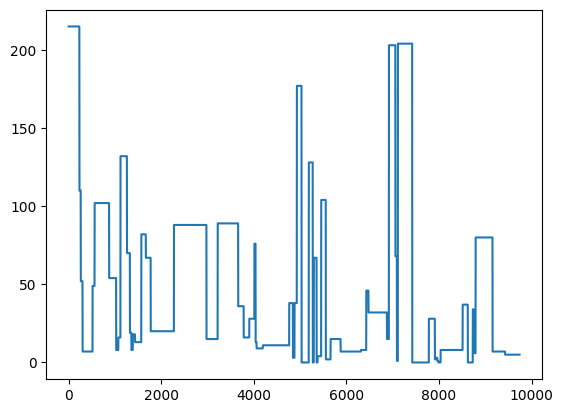

In [138]:
dfm.reviews.plot()

<AxesSubplot:>

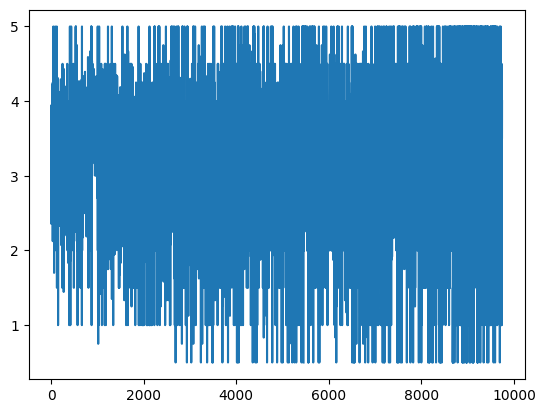

In [141]:
dfm.rating.plot()

In [139]:
dfm['rating'] = dfm.apply(lambda x: dfr[dfr['movieId']==x[0]].rating.mean(), axis=1)

In [45]:
#How many users are in the datasets?

len(np.unique(dfr.userId))

610

In [44]:
#How many movies are in the dataset?

len(np.unique(dfm.movieId))

9742

In [52]:
#How many of these movies are rated by users?

len(np.unique(pd.merge(dfr, dfm, on='movieId').movieId))

9724

In [56]:
len(dfr[dfr['userId']==1])

232

In [62]:
#How many users have rated each movie?

c = 0
for id_user in np.unique(dfr.userId):
    if len(dfr[dfr['userId']==1]) == 9742: c+=1
print(c)

0


In [80]:
#Are there any rows that contain null values for some of the columns? Should these be dropped?

print(dfr.isnull().sum(),'\n\n',dfm.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64 

 movieId    0
title      0
genres     0
dtype: int64


In [90]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
